<a href="https://colab.research.google.com/github/Isra1997/AverageFilter/blob/master/AverageFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

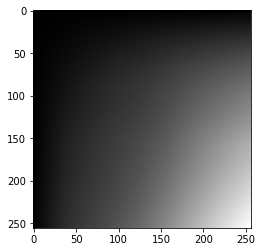

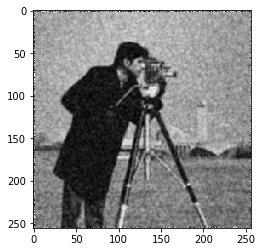

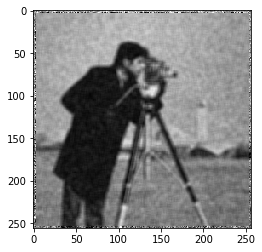

In [0]:
from PIL import  Image
import numpy as np
import matplotlib.pyplot as plt
import math

def IntegralImage(image):
    #converting the image into a 2D list
    Nimage=np.array(image)
    SumOfImage=Nimage.sum()

    #Creating a new result numpy array
    result_s=np.zeros((Nimage.shape[0],Nimage.shape[1]))
    result_i=np.zeros((Nimage.shape[0],Nimage.shape[1]))
    result_f=np.zeros((Nimage.shape[0],Nimage.shape[1]))

    #copy image value
    for i in range(0,Nimage.shape[0]):
        for j in range(0,Nimage.shape[1]):
            result_s[i][j] = Nimage[i][j]
            result_i[i][j] = Nimage[i][j]
            result_f[i][j] = Nimage[i][j]

    #Calculating s(i,j)
    for i in range(0,Nimage.shape[0]):
        for j in range(0,Nimage.shape[1]):
            if(j-1==-1):
                result_s[i][j]=0+Nimage[i][j]
            else :
                result_s[i][j]=result_s[i][j-1]+Nimage[i][j]

    #Calculating ii(i,j)
    for i in range(0,result_s.shape[0]):
        for j in range(0,result_s.shape[1]):
            if(i-1==-1):
                result_i[i][j]=0+result_s[i][j]
            else :
                result_i[i][j]=result_i[i-1][j]+result_s[i][j]

    # Mapping the images to the range of 0-255
    for i in range(0,result_i.shape[0]):
        for j in range(0,result_i.shape[1]):
            result_f[i][j]=translate(result_i[i][j], 0, 255 ,0,SumOfImage)

    return result_f,result_i

# Map valuse  in the range 0 to 255
def translate(value, leftMin, leftMax,righMin,rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan =rightMax-righMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = int(float(value - leftMin) / float(leftSpan))

    # Convert the 0-1 range into a value in the right range.
    return 0 + (valueScaled * rightSpan)


def AverageFilter(image,widthF,hieghtF):
    int,WorkOnImage=IntegralImage(image)
    width,hieght=WorkOnImage.shape
    result_g=np.array(image)
    stepLow=math.floor(widthF/2)
    stepHigh=math.ceil(widthF/2)
    divisor=widthF*hieghtF
    for i in range(stepLow,width-stepLow):
        for j in range(stepLow,hieght-stepLow):
            if((i==stepLow )& (j==stepLow)):
                result_g[i][j] = (WorkOnImage[i+stepLow][j+stepLow])/divisor
            else:
                a=WorkOnImage[i-stepHigh][j-stepHigh]
                b=WorkOnImage[i+stepLow][j-stepHigh]
                c=WorkOnImage[i-stepHigh][j+stepLow]
                d=WorkOnImage[i+stepLow][j+stepLow]
                result_g[i][j]= (d+a-b-c)/divisor

    return result_g


# Note: The use of integral images uses less computaion compared to using the original image to calculate the the filtered image.


def main():
    openImg=Image.open("/content/Cameraman_noise.bmp").convert('L')

    # result of Part (a)
    result,int=IntegralImage(openImg)
    plt.imshow(result,cmap='gray')
    plt.show()

    threeFilter=AverageFilter(openImg, 3, 3)
    plt.imshow(threeFilter,cmap='gray')
    plt.show()

    fiveFilter=AverageFilter(openImg, 5, 5)
    plt.imshow(fiveFilter,cmap='gray')
    plt.show()



if __name__=="__main__":
    main()
